# Knife-edge in elevated duct
example from [Lytaev M. S. Nonlocal Boundary Conditions for Split-Step Padé Approximations of the Helmholtz Equation With Modified Refractive Index
//IEEE Antennas and Wireless Propagation Letters. – 2018. – Vol. 17. – N. 8. – pp. 1561-1565.](https://ieeexplore.ieee.org/document/8409980)

In [1]:
import os
os.chdir('../../../')
from rwp.sspade import *
from rwp.environment import *
from rwp.vis import *

Preparing the environment

In [2]:
elevated_duct = interp1d(x=[0, 100, 150, 300], y=[0, 32, 10, 50], fill_value="extrapolate")
environment = Troposphere()
environment.ground_material = PerfectlyElectricConducting()
environment.z_max = 300
environment.M_profile = lambda x, z: elevated_duct(z)
environment.knife_edges = [KnifeEdge(range=70e3, height=150)]
max_range = 100000

Preparing the transmitting antenna

In [3]:
antenna = GaussAntenna(wavelength=0.1,
                       height=30,
                       beam_width=2,
                       eval_angle=0,
                       polarz='H')

Specifying computational parameters of the finite-difference Pade propagator

In [4]:
computational_params78 = HelmholtzPropagatorComputationalParams(exp_pade_order=(7, 8),
                                                                z_order=4,
                                                                dx_wl=400,
                                                                dz_wl=1,
                                                                x_output_filter=1,
                                                                z_output_filter=1,
                                                                two_way=True,
                                                                max_propagation_angle=10)
pade78_task = TroposphericRadioWaveSSPadePropagator(antenna=antenna,
                                                    env=environment,
                                                    max_range_m=max_range,
                                                    comp_params=computational_params78)

Specifying computational parameters of the Crank-Nikolson propagator

In [5]:
computational_params_cn = HelmholtzPropagatorComputationalParams(exp_pade_order=(1, 1),
                                                                 two_way=True,
                                                                 z_order=2,
                                                                 dx_wl=80,
                                                                 x_output_filter=5,
                                                                 dz_wl=1,
                                                                 z_output_filter=1,
                                                                 max_propagation_angle=10)
crank_nicolson_task = TroposphericRadioWaveSSPadePropagator(antenna=antenna,
                                                            env=environment,
                                                            max_range_m=max_range,
                                                            comp_params=computational_params_cn)

Start computation

In [6]:
pade78_field = pade78_task.calculate()
crank_nicolson_field = crank_nicolson_task.calculate()

Visualising the results

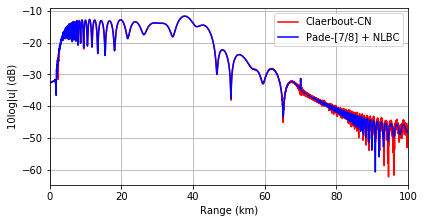

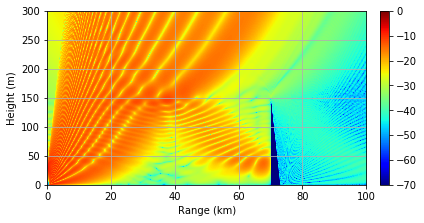

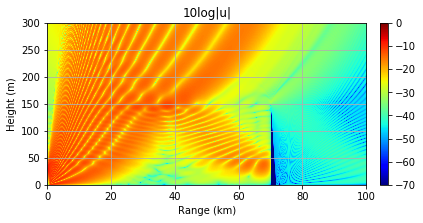

In [7]:
pade78_vis = FieldVisualiser(pade78_field, trans_func=lambda v: 10 * cm.log10(1e-16 + abs(v)),
                             label='Pade-[7/8] + NLBC', x_mult=1E-3)
crank_nicolson_vis = FieldVisualiser(crank_nicolson_field, trans_func=lambda v: 10 * cm.log10(1e-16 + abs(v)),
                                     label='Claerbout-CN', x_mult=1E-3)
plt = crank_nicolson_vis.plot_hor(150, pade78_vis)
plt.xlabel('Range (km)')
plt.ylabel('10log|u| (dB)')
plt.tight_layout()
plt.grid(True)
plt.show()

plt = crank_nicolson_vis.plot2d(min=-70, max=0)
plt.xlabel('Range (km)')
plt.ylabel('Height (m)')
plt.tight_layout()
plt.grid(True)
plt.show()

plt = pade78_vis.plot2d(min=-70, max=0)
plt.title('10log|u|')
plt.xlabel('Range (km)')
plt.ylabel('Height (m)')
plt.tight_layout()
plt.grid(True)
plt.show()
